In [17]:
# import librosa
# import os
# import numpy as np

# # Define dataset paths
# train_questions_path = "cleaned_dataset/train/questions"
# train_others_path    = "cleaned_dataset/train/others"
# test_questions_path  = "cleaned_dataset/test/questions"
# test_others_path     = "cleaned_dataset/test/others"

# # Gather file lists
# train_q_files = [os.path.join(train_questions_path, f) for f in os.listdir(train_questions_path) if f.endswith('.wav')]
# train_o_files = [os.path.join(train_others_path, f) for f in os.listdir(train_others_path) if f.endswith('.wav')]
# test_q_files  = [os.path.join(test_questions_path, f) for f in os.listdir(test_questions_path) if f.endswith('.wav')]
# test_o_files  = [os.path.join(test_others_path, f) for f in os.listdir(test_others_path) if f.endswith('.wav')]

# print(f"Number of training question files: {len(train_q_files)}")
# print(f"Number of training other files: {len(train_o_files)}")
# print(f"Number of testing question files: {len(test_q_files)}")
# print(f"Number of testing other files: {len(test_o_files)}")

# # Compute duration (seconds) for each file in training set
# train_q_durations = []
# train_o_durations = []
# for file in train_q_files:
#     y, sr = librosa.load(file, sr=None)  # use original sampling rate
#     train_q_durations.append(len(y)/sr)
# for file in train_o_files:
#     y, sr = librosa.load(file, sr=None)
#     train_o_durations.append(len(y)/sr)

# print(f"Average duration - Questions: {np.mean(train_q_durations):.2f} s")
# print(f"Average duration - Others:    {np.mean(train_o_durations):.2f} s")
# print(f"Max duration - Questions: {np.max(train_q_durations):.2f} s")
# print(f"Max duration - Others:    {np.max(train_o_durations):.2f} s")

In [18]:
# import matplotlib.pyplot as plt
# import librosa.display

# # Pick one example from each category
# example_q_file = train_q_files[0]
# example_o_file = train_o_files[0]

# # Load audio examples (convert to mono if not already)
# y_q, sr_q = librosa.load(example_q_file, sr=None)
# y_o, sr_o = librosa.load(example_o_file, sr=None)

# # Compute spectrograms (magnitude of STFT)
# D_q = np.abs(librosa.stft(y_q, n_fft=1024, hop_length=512))
# D_o = np.abs(librosa.stft(y_o, n_fft=1024, hop_length=512))
# # Convert to dB scale for visualization
# D_q_db = librosa.amplitude_to_db(D_q, ref=np.max)
# D_o_db = librosa.amplitude_to_db(D_o, ref=np.max)

# # Plot side by side
# fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# librosa.display.specshow(
#     D_q_db, sr=sr_q, hop_length=512, x_axis="time", y_axis="hz", ax=axes[0]
# )
# axes[0].set_title("Question Example")
# librosa.display.specshow(
#     D_o_db, sr=sr_o, hop_length=512, x_axis="time", y_axis="hz", ax=axes[1]
# )
# axes[1].set_title("Statement Example")
# plt.colorbar(
#     librosa.display.specshow(D_o_db, sr=sr_o, hop_length=512),
#     ax=axes,
#     format="%+2.0f dB",
# )
# plt.tight_layout()
# plt.show()

In [19]:
# # Compute average spectral centroid for each file, then average by class
# centroid_q = []
# centroid_o = []
# for file in train_q_files:
#     y, sr = librosa.load(file, sr=None)
#     cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#     centroid_q.append(np.mean(cent))
# for file in train_o_files:
#     y, sr = librosa.load(file, sr=None)
#     cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#     centroid_o.append(np.mean(cent))

# print(f"Mean spectral centroid (Questions): {np.mean(centroid_q):.1f} Hz")
# print(f"Mean spectral centroid (Others):    {np.mean(centroid_o):.1f} Hz")

In [20]:
# # Feature extraction: MFCCs for each audio
# def extract_features(file_path, sr=16000, n_mfcc=13):
#     # Load audio to a fixed sampling rate
#     y, sr = librosa.load(file_path, sr=sr)
#     # Compute MFCCs
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
#     # Take the mean and standard deviation of each coefficient over time
#     mfcc_mean = mfcc.mean(axis=1)
#     mfcc_std = mfcc.std(axis=1)
#     # Concatenate mean and std to get a feature vector
#     feat_vector = np.concatenate([mfcc_mean, mfcc_std])
#     return feat_vector


# # Prepare training feature matrix X and labels y
# X_train = []
# y_train = []
# for file in train_q_files:
#     X_train.append(extract_features(file))
#     y_train.append(1)  # label 1 for question
# for file in train_o_files:
#     X_train.append(extract_features(file))
#     y_train.append(0)  # label 0 for other

# X_train = np.array(X_train)
# y_train = np.array(y_train)

# print("Training feature matrix shape:", X_train.shape)

In [25]:
# # Prepare testing feature matrix and labels
# X_test = []
# y_test = []
# for file in test_q_files:
#     X_test.append(extract_features(file))
#     y_test.append(1)
# for file in test_o_files:
#     X_test.append(extract_features(file))
#     y_test.append(0)

# X_test = np.array(X_test)
# y_test = np.array(y_test)
# print("Testing feature matrix shape:", X_test.shape)

In [26]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [27]:
# from sklearn.linear_model import LogisticRegression

# # Initialize logistic regression; use a high max_iter for convergence
# clf = LogisticRegression(max_iter=1000, random_state=42)
# clf.fit(X_train_scaled, y_train)

# # Evaluate on training set (to check for overfitting)
# train_preds = clf.predict(X_train_scaled)
# train_acc = np.mean(train_preds == y_train)
# print(f"Training accuracy: {train_acc*100:.2f}%")

In [29]:
# # Evaluate on test set
# test_preds = clf.predict(X_test_scaled)
# test_acc = np.mean(test_preds == y_test)
# print(f"Test accuracy: {test_acc*100:.2f}%")

In [30]:
# from sklearn.metrics import confusion_matrix, classification_report

# cm = confusion_matrix(y_test, test_preds)
# print("Confusion Matrix (labels: [Others, Questions]):")
# print(cm)
# print("\nClassification Report:")
# print(classification_report(y_test, test_preds, target_names=["Other", "Question"]))

In [31]:
import os
import numpy as np
import librosa

# Parameters for audio processing
SR = 22050  # Sample rate for audio
DURATION = 2.5  # Target duration for each clip in seconds
N_MELS = 128  # Number of Mel frequency bands for the spectrogram

# Calculate the number of samples for the given duration
max_samples = int(SR * DURATION)


def extract_mel_spectrogram(file_path, sr=SR, duration=DURATION, n_mels=N_MELS):
    """Load an audio file, pad/trim to fixed duration, and return a normalized Mel spectrogram."""
    # Load audio file in mono
    y, sr = librosa.load(file_path, sr=sr)
    # Pad or trim audio to the desired length
    if len(y) < max_samples:
        # Pad with zeros if shorter
        padding = max_samples - len(y)
        y = np.pad(y, (0, padding), mode="constant")
    else:
        # Trim to exact desired length
        y = y[:max_samples]
    # Compute Mel spectrogram (power spectrogram by default)
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=sr, n_mels=n_mels  # keyword-only in librosa ≥ 0.10
    )
    # Convert to log scale (decibels). Use the peak power as reference.
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)
    # Normalize the spectrogram to 0-1 range
    mel_db_norm = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min() + 1e-6)
    return mel_db_norm


# Paths to training and testing folders
train_question_path = "cleaned_dataset/train/questions"
train_other_path = "cleaned_dataset/train/others"
test_question_path = "cleaned_dataset/test/questions"
test_other_path = "cleaned_dataset/test/others"

X_train = []
y_train = []

# Process all training question audio files
for filename in os.listdir(train_question_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(train_question_path, filename)
        mel_spect = extract_mel_spectrogram(file_path)
        X_train.append(mel_spect)
        y_train.append(1)  # label 1 for question

# Process all training other audio files
for filename in os.listdir(train_other_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(train_other_path, filename)
        mel_spect = extract_mel_spectrogram(file_path)
        X_train.append(mel_spect)
        y_train.append(0)  # label 0 for other (non-question)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Add channel dimension to X (for CNN input)
X_train = X_train[..., np.newaxis].astype("float32")
print(
    "Training set spectrograms shape:",
    X_train.shape,
    "Training labels shape:",
    y_train.shape,
)

# Repeat the same steps for the test set
X_test = []
y_test = []

# Process testing question files
for filename in os.listdir(test_question_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(test_question_path, filename)
        mel_spect = extract_mel_spectrogram(file_path)
        X_test.append(mel_spect)
        y_test.append(1)  # question label

# Process testing other files
for filename in os.listdir(test_other_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(test_other_path, filename)
        mel_spect = extract_mel_spectrogram(file_path)
        X_test.append(mel_spect)
        y_test.append(0)  # other label

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test[..., np.newaxis].astype("float32")
print("Test set spectrograms shape:", X_test.shape, "Test labels shape:", y_test.shape)

Training set spectrograms shape: (10273, 128, 108, 1) Training labels shape: (10273,)
Test set spectrograms shape: (7145, 128, 108, 1) Test labels shape: (7145,)


In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model architecture
model = models.Sequential(
    [
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            input_shape=(128, X_train.shape[2], 1),
        ),  # X_train.shape[2] is the time-frame dimension
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(
            1, activation="sigmoid"
        ),  # single output neuron for binary classification
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()  # print model architecture

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the model with a validation split for monitoring
history = model.fit(
    X_train,
    y_train,
    epochs=30,  # you can adjust the number of epochs
    batch_size=32,  # adjust batch size based on data size
    validation_split=0.2,  # use 20% of training data for validation
    callbacks=[early_stop],
    verbose=1,
)

/Users/mateu/Education/sem8/ml/project/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 108, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 54, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 55296)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,539,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,557,889 (13.57 MB)

 Trainable params: 3,557,889 (13.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.6179 - loss: 0.6906 - val_accuracy: 0.4959 - val_loss: 0.7250
Epoch 2/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.6792 - loss: 0.6130 - val_accuracy: 0.7353 - val_loss: 0.5608
Epoch 3/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7354 - loss: 0.5320 - val_accuracy: 0.7236 - val_loss: 0.5277
Epoch 4/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7963 - loss: 0.4271 - val_accuracy: 0.7319 - val_loss: 0.5359
Epoch 5/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.8336 - loss: 0.3611 - val_accuracy: 0.8127 - val_loss: 0.4035
Epoch 6/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8837 - loss: 0.2745 - val_accuracy: 0.8102 - val_loss: 0.4442
Epoch 7/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9132 - loss: 0.2056 - val_accuracy: 0.8287 - val_loss: 0.3997
Epoch 8/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9378 - loss: 0.1615 - 

Test Accuracy: 0.82
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
Confusion Matrix (actual vs predicted):
[[5140  902]
 [ 403  700]]
Classification Report:
              precision    recall  f1-score   support

      others       0.93      0.85      0.89      6042
   questions       0.44      0.63      0.52      1103

    accuracy                           0.82      7145
   macro avg       0.68      0.74      0.70      7145
weighted avg       0.85      0.82      0.83      7145



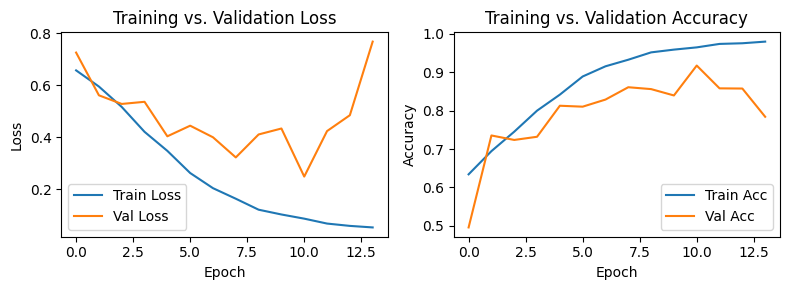

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict classes for test set
y_pred_prob = model.predict(X_test)
y_pred = (
    (y_pred_prob >= 0.5).astype(int).flatten()
)  # threshold at 0.5 and convert to 0/1

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (actual vs predicted):")
print(cm)

# Classification report
class_names = ["others", "questions"]
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot training & validation loss and accuracy curves
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.tight_layout()
plt.show()